Test: GSoC Candidate Assessment
Github Repository : https://github.com/Rakotobesalimo/test_gsoc_humanai.git

Task 1: Social Media Data Extraction & Preprocessing (API Handling & Text Cleaning)

Delivrable:
A Python script that retrieves and stores filtered social media posts.
A cleaned dataset ready for NLP analysis.

In [ ]:
"""
Reddit Data Extraction Module

This module provides functionality to extract crisis-related data from Reddit using the PRAW library.
It includes features for authentication, subreddit searching, and data processing.

Key Features:
- OAuth 2.0 authentication with Reddit API
- Search across multiple crisis-related subreddits
- Processing of post data into structured format
- Saving results to CSV files

Dependencies:
- praw: For Reddit API access
- pandas: For data manipulation
- dotenv: For environment variable management
"""

In [1]:
import praw
import pandas as pd
from datetime import datetime
import os
from dotenv import load_dotenv

In [5]:
class RedditDataExtractor:
    """
    A class for extracting crisis-related data from Reddit.
    
    This class handles authentication with the Reddit API and data extraction
    from crisis-related subreddits. It includes methods for searching posts,
    processing the results, and saving them to CSV files.
    
    Attributes:
        client_id (str): Reddit API client ID
        client_secret (str): Reddit API client secret
        user_agent (str): Reddit API user agent
        subreddits (list): List of crisis-related subreddits to search
        keywords (list): List of crisis-related keywords to search for
        reddit (praw.Reddit): Authenticated Reddit API client
    """
    
    def __init__(self):
        """
        Initialize the RedditDataExtractor with API credentials and settings.
        
        Loads credentials from environment variables and sets up subreddits
        and keywords for crisis-related content extraction.
        
        Raises:
            ValueError: If any required API credentials are missing
        """
        load_dotenv()
        self.client_id = os.getenv('REDDIT_CLIENT_ID')
        self.client_secret = os.getenv('REDDIT_CLIENT_SECRET')
        self.user_agent = os.getenv('REDDIT_USER_AGENT')
        
        # Crisis-related subreddits and keywords
        self.subreddits = [
            "depression", "anxiety", "mentalhealth",
            "SuicideWatch", "addiction", "therapy",
            "mentalillness", "psychology", "selfhelp"
        ]
        
        self.keywords = [
            "depressed", "anxiety", "suicidal", "mental health",
            "overwhelmed", "help needed", "crisis", "addiction",
            "therapy", "counseling", "support", "mental illness",
            "psychiatric", "emotional distress", "self harm"
        ]
        
        self.reddit = self._authenticate()
    
    def _authenticate(self):
        """
        Authenticate with Reddit API using OAuth 2.0.
        
        Returns:
            praw.Reddit: Authenticated Reddit API client or None if authentication fails
            
        This method:
        1. Creates a Reddit client with OAuth credentials
        2. Handles authentication errors gracefully
        """
        try:
            reddit = praw.Reddit(
                client_id=self.client_id,
                client_secret=self.client_secret,
                user_agent=self.user_agent
            )
            return reddit
        except Exception as e:
            print(f"Authentication failed: {str(e)}")
            return None
    
    def search_subreddit(self, subreddit_name, limit=100):
        """
        Search for posts in a specific subreddit.
        
        Args:
            subreddit_name (str): Name of the subreddit to search
            limit (int): Maximum number of posts to retrieve (default: 100)
            
        Returns:
            list: List of Reddit post objects matching the search criteria
            
        This method:
        1. Searches for posts containing any of the crisis-related keywords
        2. Limits results to posts from the last month
        3. Handles search errors gracefully
        """
        try:
            subreddit = self.reddit.subreddit(subreddit_name)
            posts = subreddit.search(
                query=" OR ".join(self.keywords),
                limit=limit,
                time_filter='month'
            )
            return posts
        except Exception as e:
            print(f"Error searching subreddit {subreddit_name}: {str(e)}")
            return []
    
    def process_posts(self, posts):
        """
        Process Reddit posts into a structured format.
        
        Args:
            posts: List of Reddit post objects
            
        Returns:
            pd.DataFrame: Processed posts with relevant fields
            
        The processed data includes:
        - Post ID and title
        - Text content
        - Creation timestamp
        - Score and comment count
        - Subreddit name
        - Post URL
        """
        processed_posts = []
        
        for post in posts:
            processed_posts.append({
                'post_id': post.id,
                'title': post.title,
                'text': post.selftext,
                'created_at': datetime.fromtimestamp(post.created_utc),
                'score': post.score,
                'num_comments': post.num_comments,
                'subreddit': post.subreddit.display_name,
                'url': post.url
            })
        
        return pd.DataFrame(processed_posts)
    
    def save_to_csv(self, df, filename):
        """
        Save processed posts to CSV file.
        
        Args:
            df (pd.DataFrame): Data to save
            filename (str): Path to save the CSV file
            
        Creates the output directory if it doesn't exist and handles errors gracefully.
        """
        if not df.empty:
            df.to_csv(filename, index=False)
            print(f"Data saved to {filename}")
    
    def run_extraction(self, output_file='../data/raw/reddit_posts.csv'):
        """
        Run the complete extraction process.
        
        Args:
            output_file (str): Path to save the extracted data (default: 'data/raw/reddit_posts.csv')
            
        Returns:
            pd.DataFrame: Extracted and processed posts
            
        This method:
        1. Searches for posts in each subreddit
        2. Processes the posts into a structured format
        3. Combines results from all subreddits
        4. Saves the final dataset to CSV
        """
        all_posts = pd.DataFrame()
        
        for subreddit in self.subreddits:
            print(f"Searching in subreddit: {subreddit}")
            posts = self.search_subreddit(subreddit)
            processed_posts = self.process_posts(posts)
            all_posts = pd.concat([all_posts, processed_posts], ignore_index=True)
        
        self.save_to_csv(all_posts, output_file)
        return all_posts

In [8]:
def main():
    """Main function to run the Reddit data extraction."""
    # Create Reddit extractor instance
    extractor = RedditDataExtractor()
    
    
    # Extract posts
    posts = extractor.run_extraction(
        '../data/raw/reddit_posts.csv' # Number of posts per subreddit
    )
    
    print(f"Extracted posts. Data saved to ../data/raw/reddit_posts.csv")

In [9]:
if __name__ == "__main__":
    main() 

Searching in subreddit: depression


Searching in subreddit: anxiety
Searching in subreddit: mentalhealth
Searching in subreddit: SuicideWatch
Searching in subreddit: addiction
Searching in subreddit: therapy
Searching in subreddit: mentalillness
Searching in subreddit: psychology
Searching in subreddit: selfhelp
Data saved to ../data/raw/reddit_posts.csv
Extracted posts. Data saved to ../data/raw/reddit_posts.csv


In [ ]:
"""
Text Cleaning and Preprocessing Module

This module provides functionality for cleaning and preprocessing text data from social media.
It includes features for removing emojis, URLs, special characters, and stopwords.

Key Features:
- Emoji removal
- URL removal
- Special character cleaning
- Stopword removal
- Text normalization
- Batch processing of DataFrame columns

Dependencies:
- nltk: For text processing and stopwords
- emoji: For emoji handling
- pandas: For data manipulation
"""

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
import pandas as pd
import os

In [11]:

class TextCleaner:
    """
    A class for cleaning and preprocessing text data.
    
    This class provides methods for cleaning social media text by removing
    emojis, URLs, special characters, and stopwords. It supports both
    individual text cleaning and batch processing of DataFrame columns.
    
    Attributes:
        stop_words (set): Set of English stopwords with custom additions
    """
    
    def __init__(self):
        """
        Initialize the TextCleaner with required NLTK data and stopwords.
        
        Downloads necessary NLTK data and sets up a custom stopword list
        that includes common social media terms.
        """
        # Download required NLTK data
        nltk.download('punkt')
        nltk.download('stopwords')
        
        self.stop_words = set(stopwords.words('english'))
        # Add custom stopwords specific to social media
        self.stop_words.update(['rt', 'http', 'https', 'www', 'com'])
    
    def remove_emojis(self, text):
        """
        Remove emojis from text.
        
        Args:
            text (str): Input text containing emojis
            
        Returns:
            str: Text with emojis removed
            
        Uses the emoji library to identify and remove emoji characters.
        """
        return emoji.replace_emoji(text, '')
    
    def remove_urls(self, text):
        """
        Remove URLs from text.
        
        Args:
            text (str): Input text containing URLs
            
        Returns:
            str: Text with URLs removed
            
        Uses regular expressions to identify and remove both http(s) and www URLs.
        """
        url_pattern = r'https?://\S+|www\.\S+'
        return re.sub(url_pattern, '', text)
    
    def remove_special_chars(self, text):
        """
        Remove special characters and numbers from text.
        
        Args:
            text (str): Input text containing special characters
            
        Returns:
            str: Text with special characters removed
            
        Keeps only alphanumeric characters and basic punctuation marks.
        """
        # Keep only alphanumeric characters and basic punctuation
        return re.sub(r'[^a-zA-Z\s.,!?]', '', text)
    
    def remove_stopwords(self, text):
        """
        Remove stopwords from text.
        
        Args:
            text (str): Input text containing stopwords
            
        Returns:
            str: Text with stopwords removed
            
        Uses NLTK's word tokenizer and stopword list, plus custom social media stopwords.
        """
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word not in self.stop_words]
        return ' '.join(filtered_words)
    
    def clean_text(self, text):
        """
        Apply all cleaning steps to text.
        
        Args:
            text (str): Input text to clean
            
        Returns:
            str: Cleaned text
            
        The cleaning process includes:
        1. Converting to lowercase
        2. Removing emojis
        3. Removing URLs
        4. Removing special characters
        5. Removing stopwords
        6. Normalizing whitespace
        """
        if not isinstance(text, str):
            return ""
            
        text = text.lower()
        text = self.remove_emojis(text)
        text = self.remove_urls(text)
        text = self.remove_special_chars(text)
        text = self.remove_stopwords(text)
        
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    
    def process_dataframe(self, df, text_columns):
        """
        Process text columns in a DataFrame.
        
        Args:
            df (pd.DataFrame): Input DataFrame
            text_columns (list): List of column names containing text to clean
            
        Returns:
            pd.DataFrame: DataFrame with cleaned text columns
            
        Creates new columns with '_cleaned' suffix for each processed text column.
        """
        df_clean = df.copy()
        
        for column in text_columns:
            if column in df.columns:
                df_clean[f'{column}_cleaned'] = df[column].apply(self.clean_text)
        
        return df_clean
    
    def save_cleaned_data(self, df, output_file):
        """
        Save cleaned DataFrame to CSV file.
        
        Args:
            df (pd.DataFrame): Cleaned DataFrame to save
            output_file (str): Path to save the CSV file
            
        Creates the output directory if it doesn't exist.
        """
        df.to_csv(output_file, index=False)
        print(f"Cleaned data saved to {output_file}")

In [12]:
def main():
    """Main function to run the text cleaning process."""
    # Create text cleaner instance
    cleaner = TextCleaner()
    
    # Load raw data
    try:
        df = pd.read_csv('../data/raw/reddit_posts.csv')
    except FileNotFoundError:
        print("Raw Reddit data not found. Please run the data extraction script first.")
        return
    
    # Clean the text
    cleaned_df = cleaner.process_dataframe(df, ['title', 'selftext'])
    
    # Save cleaned data
    os.makedirs('../data/processed', exist_ok=True)
    cleaned_df.to_csv('../data/processed/cleaned_reddit_posts.csv', index=False)
    
    print("Text cleaning complete! Check ../data/processed/cleaned_reddit_posts.csv for results.")

In [13]:
if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /home/colombe/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Text cleaning complete! Check ../data/processed/cleaned_reddit_posts.csv for results.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/colombe/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Task 2: Sentiment & Crisis Risk Classification (NLP & Text Processing)

Deliverable:
A script that classifies posts based on sentiment and risk level.
A table or plot showing the distribution of posts by sentiment and risk category.

In [ ]:
"""
Sentiment Analysis and Risk Classification Module

This module provides functionality for:
1. Sentiment analysis using VADER
2. Risk level classification based on content
3. Visualization of sentiment and risk distributions
"""

In [26]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from typing import List, Dict
import os

In [30]:

class CrisisAnalyzer:
    """
    Analyzes social media posts for sentiment and risk levels.
    
    This class provides methods for:
    - Sentiment analysis using VADER
    - Risk level classification
    - Distribution visualization
    """
    
    def __init__(self):
        """Initialize the analyzer with VADER sentiment analyzer."""
        self.analyzer = SentimentIntensityAnalyzer()
        
        # Define risk level keywords
        self.risk_keywords = {
            'high': [
                'suicidal', 'kill myself', 'end it all', 'want to die',
                'can\'t go on', 'no way out', 'hopeless', 'worthless'
            ],
            'moderate': [
                'depressed', 'anxious', 'overwhelmed', 'struggling',
                'need help', 'can\'t cope', 'lost', 'alone'
            ],
            'low': [
                'mental health', 'therapy', 'counseling', 'support',
                'self care', 'wellness', 'mindfulness'
            ]
        }
    
    def analyze_sentiment(self, text: str) -> Dict[str, float]:
        """
        Analyze the sentiment of a text using VADER.
        
        Args:
            text (str): The text to analyze
            
        Returns:
            Dict[str, float]: Sentiment scores (negative, neutral, positive, compound)
        """
        # Handle NaN values and convert to string
        if pd.isna(text):
            return {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
        
        # Ensure text is string type
        text = str(text)
        
        return self.analyzer.polarity_scores(text)
    
    def classify_risk_level(self, text: str) -> str:
        """
        Classify the risk level of a post based on its content.
        
        Args:
            text (str): The text to classify
            
        Returns:
            str: Risk level ('high', 'moderate', 'low')
        """
        # Handle NaN values
        if pd.isna(text):
            return 'unknown'
            
        # Ensure text is string type
        text_lower = str(text).lower()
        
        # Check for high-risk keywords
        if any(keyword in text_lower for keyword in self.risk_keywords['high']):
            return 'high'
            
        # Check for moderate-risk keywords
        if any(keyword in text_lower for keyword in self.risk_keywords['moderate']):
            return 'moderate'
            
        # Check for low-risk keywords
        if any(keyword in text_lower for keyword in self.risk_keywords['low']):
            return 'low'
        
        return 'unknown'
    
    def analyze_posts(self, df: pd.DataFrame, text_column: str = 'text') -> pd.DataFrame:
        """
        Analyze a DataFrame of posts for sentiment and risk levels.
        
        Args:
            df (pd.DataFrame): DataFrame containing posts
            text_column (str): Name of the column containing post text
            
        Returns:
            pd.DataFrame: DataFrame with added sentiment and risk columns
        """
        # Add sentiment analysis columns
        sentiment_scores = df[text_column].apply(self.analyze_sentiment)
        df['sentiment_neg'] = sentiment_scores.apply(lambda x: x['neg'])
        df['sentiment_neu'] = sentiment_scores.apply(lambda x: x['neu'])
        df['sentiment_pos'] = sentiment_scores.apply(lambda x: x['pos'])
        df['sentiment_compound'] = sentiment_scores.apply(lambda x: x['compound'])
        
        # Add risk level column
        df['risk_level'] = df[text_column].apply(self.classify_risk_level)
        
        return df
    
    def plot_distributions(self, df: pd.DataFrame, output_dir: str = '../output/reports'):
        """
        Create and save plots showing the distribution of posts by sentiment and risk level.
        
        Args:
            df (pd.DataFrame): DataFrame with sentiment and risk analysis
            output_dir (str): Directory to save the plots
        """
        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        
        # Set style
        plt.style.use('seaborn')
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Sentiment and Risk Level Distributions', fontsize=16)
        
        # Plot 1: Sentiment Compound Score Distribution
        sns.histplot(data=df, x='sentiment_compound', bins=30, ax=axes[0, 0])
        axes[0, 0].set_title('Sentiment Compound Score Distribution')
        axes[0, 0].set_xlabel('Compound Score')
        axes[0, 0].set_ylabel('Count')
        
        # Plot 2: Risk Level Distribution
        risk_counts = df['risk_level'].value_counts()
        sns.barplot(x=risk_counts.index, y=risk_counts.values, ax=axes[0, 1])
        axes[0, 1].set_title('Risk Level Distribution')
        axes[0, 1].set_xlabel('Risk Level')
        axes[0, 1].set_ylabel('Count')
        
        # Plot 3: Sentiment by Risk Level
        sns.boxplot(data=df, x='risk_level', y='sentiment_compound', ax=axes[1, 0])
        axes[1, 0].set_title('Sentiment by Risk Level')
        axes[1, 0].set_xlabel('Risk Level')
        axes[1, 0].set_ylabel('Compound Score')
        
        # Plot 4: Risk Level by Platform
        if 'platform' in df.columns:
            sns.countplot(data=df, x='platform', hue='risk_level', ax=axes[1, 1])
            axes[1, 1].set_title('Risk Level by Platform')
            axes[1, 1].set_xlabel('Platform')
            axes[1, 1].set_ylabel('Count')
        
        # Adjust layout and save
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'sentiment_risk_distributions.png'))
        plt.close()

        img = mpimg.imread(os.path.join(output_dir, 'sentiment_risk_distributions.png'))
        plt.figure(figsize=(15, 12))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
        # Save statistics to text file
        with open(os.path.join(output_dir, 'sentiment_risk_stats.txt'), 'w') as f:
            f.write("Sentiment and Risk Level Statistics\n")
            f.write("=================================\n\n")
            
            f.write("Risk Level Distribution:\n")
            f.write(str(risk_counts) + "\n\n")
            
            f.write("Sentiment Statistics by Risk Level:\n")
            for risk_level in df['risk_level'].unique():
                f.write(f"\n{risk_level.upper()} RISK:\n")
                stats = df[df['risk_level'] == risk_level]['sentiment_compound'].describe()
                f.write(str(stats) + "\n")

        # print the results
        with open(os.path.join(output_dir, 'sentiment_risk_stats.txt'), 'r') as f:
            print(f.read())

In [31]:
def main():
    """Main function to run the analysis."""
    # Create analyzer instance
    analyzer = CrisisAnalyzer()
    
    # Load data
    try:
        # Load cleaned Reddit data
        df = pd.read_csv('../data/processed/cleaned_reddit_posts.csv')
    except FileNotFoundError:
        print("Cleaned Reddit data not found. Please run the preprocessing script first.")
        return
    
    # Analyze posts
    analyzed_df = analyzer.analyze_posts(df)
    
    # Save analyzed data
    os.makedirs('../data/processed', exist_ok=True)
    analyzed_df.to_csv('../data/processed/analyzed_reddit_posts.csv', index=False)
    
    # Create and save visualizations
    analyzer.plot_distributions(analyzed_df)
    
    print("Analysis complete! Check the output directory for results.") 

/tmp/ipykernel_2723348/170620774.py:116: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


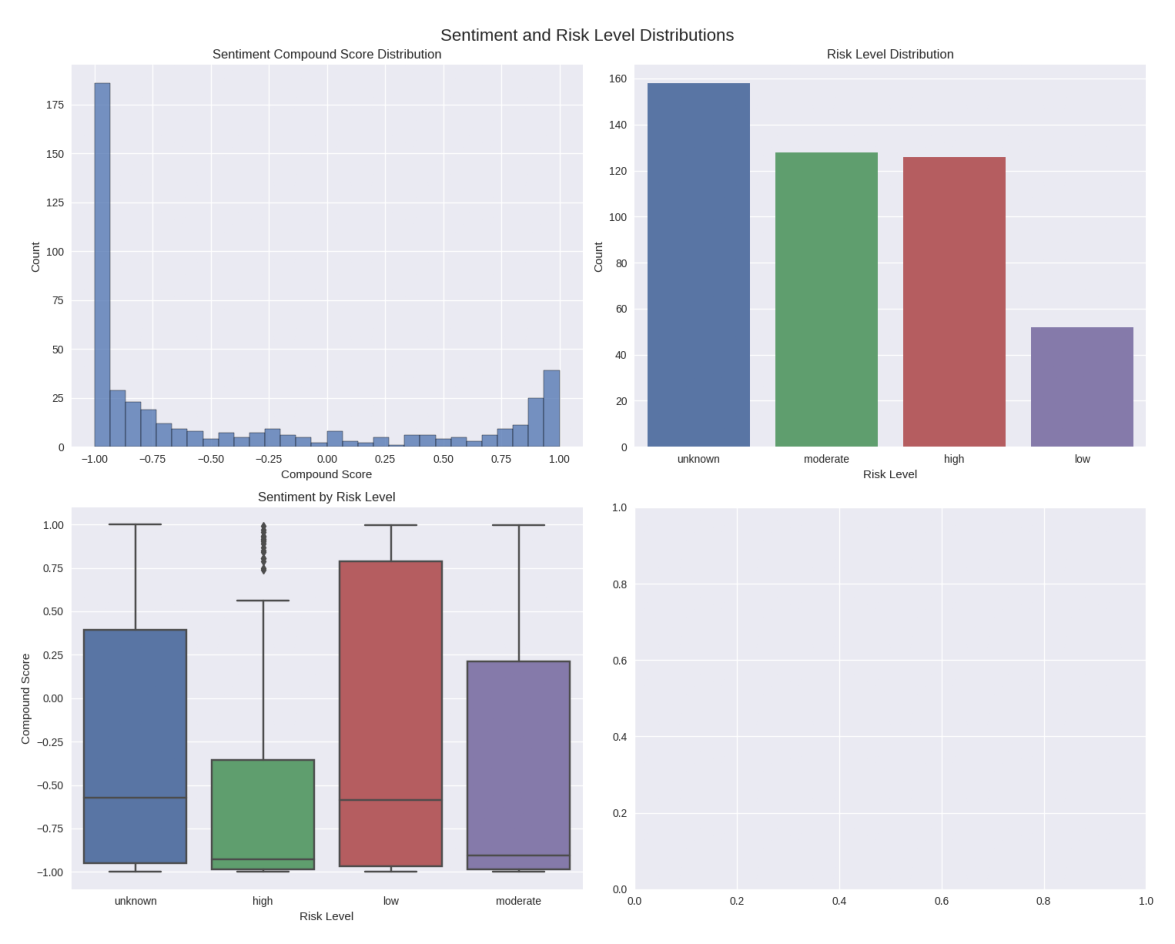

Sentiment and Risk Level Statistics

Risk Level Distribution:
risk_level
unknown     158
moderate    128
high        126
low          52
Name: count, dtype: int64

Sentiment Statistics by Risk Level:

UNKNOWN RISK:
count    158.000000
mean      -0.288468
std        0.705069
min       -0.998700
25%       -0.948900
50%       -0.571100
75%        0.393575
max        0.998900
Name: sentiment_compound, dtype: float64

HIGH RISK:
count    126.000000
mean      -0.557937
std        0.662601
min       -0.999300
25%       -0.986925
50%       -0.926600
75%       -0.355500
max        0.992900
Name: sentiment_compound, dtype: float64

LOW RISK:
count    52.000000
mean     -0.176056
std       0.845375
min      -0.997600
25%      -0.969150
50%      -0.588000
75%       0.786100
max       0.998300
Name: sentiment_compound, dtype: float64

MODERATE RISK:
count    128.000000
mean      -0.424223
std        0.788318
min       -0.999500
25%       -0.984825
50%       -0.906250
75%        0.212900
max        

In [32]:
if __name__ == "__main__":
    main()

Task 3: Crisis Geolocation & Mapping (Basic Geospatial Analysis & Visualization)

Deliverable:
A Python script that geocodes posts and generates a heatmap of crisis discussions.
A visualization of regional distress patterns in the dataset.

In [33]:
"""
Geocoding and Location Extraction Module

This module provides functionality for extracting and geocoding locations from text data.
It uses the Nominatim geocoding service to convert location names to coordinates.

Key Features:
- Location extraction from text using regex patterns
- Geocoding of extracted locations
- Caching of geocoding results
- Batch processing of DataFrame columns
- Top locations analysis

Dependencies:
- geopy: For geocoding services
- pandas: For data manipulation
- typing: For type hints
"""

'\nGeocoding and Location Extraction Module\n\nThis module provides functionality for extracting and geocoding locations from text data.\nIt uses the Nominatim geocoding service to convert location names to coordinates.\n\nKey Features:\n- Location extraction from text using regex patterns\n- Geocoding of extracted locations\n- Caching of geocoding results\n- Batch processing of DataFrame columns\n- Top locations analysis\n\nDependencies:\n- geopy: For geocoding services\n- pandas: For data manipulation\n- typing: For type hints\n'

In [34]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd
import re
import time
from typing import Dict, List, Optional, Tuple

In [35]:

class LocationExtractor:
    """
    A class for extracting and geocoding locations from text.
    
    This class provides methods for identifying location mentions in text,
    converting them to coordinates, and processing location data in bulk.
    It includes caching to improve performance and reduce API calls.
    
    Attributes:
        geolocator (Nominatim): Geocoding service client
        location_cache (dict): Cache for geocoding results
    """
    
    def __init__(self):
        """
        Initialize the LocationExtractor with geocoding service.
        
        Sets up the Nominatim geocoder with a custom user agent and
        initializes the location cache.
        """
        self.geolocator = Nominatim(user_agent="crisis_analysis_app")
        self.location_cache = {}  # Cache for geocoding results
    
    def extract_location_from_text(self, text: str) -> Optional[str]:
        """
        Extract potential location mentions from text.
        
        Args:
            text (str): Input text to analyze
            
        Returns:
            Optional[str]: Extracted location name or None if no location found
            
        Uses regex patterns to identify location mentions in the format:
        - "in [Location]"
        - "from [Location]"
        - "at [Location]"
        - "[Location]"
        
        Only returns locations with 3 or fewer words to avoid false positives.
        """
        if not isinstance(text, str):
            return None
        
        # Common location patterns
        patterns = [
            r'in\s+([A-Za-z\s]+(?:City|Town|Village|County|State|Country))',
            r'from\s+([A-Za-z\s]+(?:City|Town|Village|County|State|Country))',
            r'at\s+([A-Za-z\s]+(?:City|Town|Village|County|State|Country))',
            r'([A-Za-z\s]+(?:City|Town|Village|County|State|Country))',
        ]
        
        for pattern in patterns:
            match = re.search(pattern, text, re.IGNORECASE)
            if match:
                location = match.group(1).strip()
                # Basic validation
                if len(location.split()) <= 3:  # Avoid long strings that are likely not locations
                    return location
        
        return None
    
    def geocode_location(self, location: str) -> Optional[Tuple[float, float]]:
        """
        Convert location string to coordinates.
        
        Args:
            location (str): Location name to geocode
            
        Returns:
            Optional[Tuple[float, float]]: (latitude, longitude) tuple or None if geocoding fails
            
        This method:
        1. Checks the cache for existing results
        2. Makes API calls with rate limiting
        3. Caches successful results
        4. Handles geocoding errors gracefully
        """
        if not location:
            return None
        
        # Check cache first
        if location in self.location_cache:
            return self.location_cache[location]
        
        try:
            # Add delay to avoid rate limiting
            time.sleep(1)
            location_data = self.geolocator.geocode(location)
            
            if location_data:
                coords = (location_data.latitude, location_data.longitude)
                self.location_cache[location] = coords
                return coords
        except GeocoderTimedOut:
            print(f"Geocoding timed out for location: {location}")
        except Exception as e:
            print(f"Error geocoding location {location}: {str(e)}")
        
        return None
    
    def process_dataframe(self, df: pd.DataFrame, text_column: str) -> pd.DataFrame:
        """
        Process DataFrame to extract and geocode locations.
        
        Args:
            df (pd.DataFrame): Input DataFrame
            text_column (str): Name of the column containing text to analyze
            
        Returns:
            pd.DataFrame: Original DataFrame with location data added
            
        Creates new columns:
        - extracted_location: Name of the extracted location
        - coordinates: Tuple of (latitude, longitude)
        - latitude: Latitude value
        - longitude: Longitude value
        """
        df_processed = df.copy()
        
        # Extract locations
        df_processed['extracted_location'] = df_processed[text_column].apply(
            self.extract_location_from_text
        )
        
        # Geocode locations
        df_processed['coordinates'] = df_processed['extracted_location'].apply(
            self.geocode_location
        )
        
        # Split coordinates into latitude and longitude
        df_processed['latitude'] = df_processed['coordinates'].apply(
            lambda x: x[0] if x else None
        )
        df_processed['longitude'] = df_processed['coordinates'].apply(
            lambda x: x[1] if x else None
        )
        
        return df_processed
    
    def get_top_locations(self, df: pd.DataFrame, n: int = 5) -> pd.DataFrame:
        """
        Get top n locations by post count.
        
        Args:
            df (pd.DataFrame): DataFrame containing location data
            n (int): Number of top locations to return (default: 5)
            
        Returns:
            pd.DataFrame: DataFrame with location names and post counts
        """
        location_counts = df['extracted_location'].value_counts().head(n)
        return pd.DataFrame({
            'location': location_counts.index,
            'post_count': location_counts.values
        })
    
    def save_geocoded_data(self, df: pd.DataFrame, output_file: str):
        """
        Save geocoded data to CSV file.
        
        Args:
            df (pd.DataFrame): DataFrame containing geocoded data
            output_file (str): Path to save the CSV file
        """
        df.to_csv(output_file, index=False)
        print(f"Geocoded data saved to {output_file}")

In [37]:
if __name__ == "__main__":
    # Test location extraction on sample Reddit data
    location_extractor = LocationExtractor()
    
    # Load sample Reddit posts
    reddit_df = pd.read_csv('../data/raw/reddit_posts.csv')
    
    # Process and geocode locations from posts
    geocoded_posts = location_extractor.process_dataframe(reddit_df, 'text')
    
    # Save geocoded data
    location_extractor.save_geocoded_data(geocoded_posts, '../data/processed/geocoded_reddit_posts.csv')

Error geocoding location a village: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=a+village&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding location a state: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=a+state&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding location a state: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=a+state&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Geocoded data saved to ../data/processed/geocoded_reddit_posts.csv


In [ ]:
"""
Crisis Map Visualization Module

This module provides tools for creating interactive maps to visualize crisis-related data
from social media platforms. It uses Folium to create HTML-based maps with various
visualization layers including heatmaps, markers, and risk level indicators.

Key Features:
- Heatmap visualization of crisis-related posts
- Location markers with customizable popups
- Risk level visualization with color-coded markers
- Top locations visualization
- Interactive HTML maps that can be opened in web browsers

Dependencies:
- folium: For creating interactive maps
- pandas: For data handling
- webbrowser: For opening maps in default browser
"""

In [38]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from typing import List, Optional
import webbrowser
import os
import numpy as np

In [39]:
class CrisisMapVisualizer:
    """
    A class for creating interactive maps to visualize crisis-related data.
    
    This class provides methods to create various types of visualizations:
    - Base maps with customizable center and zoom
    - Heatmaps showing density of crisis-related posts
    - Markers with popup information
    - Risk level visualizations with color-coded markers
    - Top locations visualization
    
    Attributes:
        map (folium.Map): The current map instance
        default_location (List[float]): Default center coordinates [lat, lon]
        default_zoom (int): Default zoom level
    """
    
    def __init__(self):
        """
        Initialize the CrisisMapVisualizer with default settings.
        
        Sets up default map center and zoom level for new map instances.
        """
        self.map = None
        self.default_location = [20, 0]  # Default center of the map
        self.default_zoom = 2
    
    def create_base_map(self, location: Optional[List[float]] = None, zoom: Optional[int] = None):
        """
        Create a base map centered at the specified location.
        
        Args:
            location (Optional[List[float]]): Center coordinates [lat, lon]. 
                Defaults to [20, 0] if not specified.
            zoom (Optional[int]): Initial zoom level. Defaults to 2 if not specified.
            
        Returns:
            folium.Map: The created map instance
        """
        if location is None:
            location = self.default_location
        if zoom is None:
            zoom = self.default_zoom
            
        self.map = folium.Map(location=location, zoom_start=zoom)
        return self.map
    
    def _is_valid_location(self, lat: float, lon: float) -> bool:
        """
        Check if location coordinates are valid.
        
        Args:
            lat (float): Latitude value
            lon (float): Longitude value
            
        Returns:
            bool: True if coordinates are valid, False otherwise
            
        A location is considered valid if:
        - Both latitude and longitude are not NaN
        - Both are numeric values
        - Latitude is between -90 and 90
        - Longitude is between -180 and 180
        """
        return (
            not pd.isna(lat) and not pd.isna(lon) and
            isinstance(lat, (int, float)) and isinstance(lon, (int, float)) and
            -90 <= lat <= 90 and -180 <= lon <= 180
        )
    
    def add_heatmap(self, df: pd.DataFrame, latitude_col: str = 'latitude', 
                   longitude_col: str = 'longitude', weight_col: Optional[str] = None):
        """
        Add a heatmap layer to the map showing the density of crisis-related posts.
        
        Args:
            df (pd.DataFrame): DataFrame containing location data
            latitude_col (str): Column name for latitude values
            longitude_col (str): Column name for longitude values
            weight_col (Optional[str]): Column name for weight values (e.g., risk level)
            
        Returns:
            folium.Map: The map with heatmap layer added
            
        Note:
            - Invalid coordinates are automatically filtered out
            - If weight_col is provided, the heatmap intensity will be weighted
            - Prints a warning if no valid coordinates are found
        """
        if self.map is None:
            self.create_base_map()
        
        # Filter out rows with invalid coordinates
        valid_coords = df[
            df.apply(lambda row: self._is_valid_location(row[latitude_col], row[longitude_col]), axis=1)
        ]
        
        if weight_col:
            # Create weighted heatmap data
            heat_data = [[row[latitude_col], row[longitude_col], row[weight_col]] 
                        for _, row in valid_coords.iterrows()]
        else:
            # Create unweighted heatmap data
            heat_data = [[row[latitude_col], row[longitude_col]] 
                        for _, row in valid_coords.iterrows()]
        
        if heat_data:  # Only add heatmap if there's valid data
            HeatMap(heat_data).add_to(self.map)
        else:
            print("Warning: No valid coordinates found for heatmap")
        
        return self.map
    
    def add_markers(self, df: pd.DataFrame, latitude_col: str = 'latitude', 
                   longitude_col: str = 'longitude', popup_col: Optional[str] = None):
        """
        Add markers to the map with optional popup text.
        
        Args:
            df (pd.DataFrame): DataFrame containing location data
            latitude_col (str): Column name for latitude values
            longitude_col (str): Column name for longitude values
            popup_col (Optional[str]): Column name for popup text
            
        Returns:
            folium.Map: The map with markers added
            
        Note:
            - Invalid coordinates are automatically filtered out
            - Markers are red circles with radius 5
            - Popup text is shown when clicking on markers
        """
        if self.map is None:
            self.create_base_map()
        
        # Filter out rows with invalid coordinates
        valid_coords = df[
            df.apply(lambda row: self._is_valid_location(row[latitude_col], row[longitude_col]), axis=1)
        ]
        
        for _, row in valid_coords.iterrows():
            popup_text = str(row[popup_col]) if popup_col and not pd.isna(row[popup_col]) else None
            
            folium.CircleMarker(
                location=[row[latitude_col], row[longitude_col]],
                radius=5,
                popup=popup_text,
                color='red',
                fill=True,
                fill_color='red'
            ).add_to(self.map)
        
        return self.map
    
    def add_risk_level_layer(self, df: pd.DataFrame, latitude_col: str = 'latitude',
                           longitude_col: str = 'longitude', risk_col: str = 'risk_level'):
        """
        Add markers colored by risk level.
        
        Args:
            df (pd.DataFrame): DataFrame containing location and risk data
            latitude_col (str): Column name for latitude values
            longitude_col (str): Column name for longitude values
            risk_col (str): Column name for risk level values
            
        Returns:
            folium.Map: The map with risk level markers added
            
        Note:
            - Risk levels are color-coded:
                - high: red
                - moderate: orange
                - low: green
                - unknown: gray
            - Invalid coordinates are automatically filtered out
            - Markers show risk level in popup
        """
        if self.map is None:
            self.create_base_map()
        
        # Define colors for different risk levels
        risk_colors = {
            'high': 'red',
            'moderate': 'orange',
            'low': 'green'
        }
        
        # Filter out rows with invalid coordinates
        valid_coords = df[
            df.apply(lambda row: self._is_valid_location(row[latitude_col], row[longitude_col]), axis=1)
        ]
        
        for _, row in valid_coords.iterrows():
            risk_level = row[risk_col] if not pd.isna(row[risk_col]) else 'unknown'
            color = risk_colors.get(risk_level, 'gray')
            
            folium.CircleMarker(
                location=[row[latitude_col], row[longitude_col]],
                radius=5,
                popup=f"Risk Level: {risk_level}",
                color=color,
                fill=True,
                fill_color=color
            ).add_to(self.map)
        
        return self.map
    
    def save_map(self, output_file: str = 'crisis_heatmap.html'):
        """
        Save the current map to an HTML file.
        
        Args:
            output_file (str): Path to save the HTML file
            
        Creates the output directory if it doesn't exist and opens the map
        in the default web browser.
        """
        if self.map is None:
            print("No map to save. Create a map first using create_base_map().")
            return
        
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(output_file), exist_ok=True)
        
        # Save the map
        self.map.save(output_file)
        print(f"Map saved to {output_file}")
        
        # Open in default browser
        webbrowser.open('file://' + os.path.abspath(output_file))
    
    def show_top_locations(self, df: pd.DataFrame, n: int = 5,
                         latitude_col: str = 'latitude', longitude_col: str = 'longitude',
                         location_col: str = 'extracted_location'):
        """
        Create a map showing the top n locations by post count.
        
        Args:
            df (pd.DataFrame): DataFrame containing location data
            n (int): Number of top locations to show (default: 5)
            latitude_col (str): Column name for latitude values
            longitude_col (str): Column name for longitude values
            location_col (str): Column name for location names
            
        Returns:
            folium.Map: The map with top location markers
            
        Note:
            - Locations are sorted by post count
            - Markers show location name and post count in popup
            - Invalid coordinates are automatically filtered out
        """
        if self.map is None:
            self.create_base_map()
        
        # Get top locations by post count
        top_locations = df[location_col].value_counts().head(n)
        
        # Filter out rows with invalid coordinates
        valid_coords = df[
            df.apply(lambda row: self._is_valid_location(row[latitude_col], row[longitude_col]), axis=1)
        ]
        
        # Add markers for top locations
        for location in top_locations.index:
            location_data = valid_coords[valid_coords[location_col] == location]
            if not location_data.empty:
                # Use the first occurrence's coordinates
                row = location_data.iloc[0]
                count = top_locations[location]
                
                folium.CircleMarker(
                    location=[row[latitude_col], row[longitude_col]],
                    radius=5,
                    popup=f"{location}<br>Posts: {count}",
                    color='blue',
                    fill=True,
                    fill_color='blue'
                ).add_to(self.map)
        
        return self.map

In [41]:

def main():
    """Main function to create crisis maps."""
    # Create map visualizer instance
    visualizer = CrisisMapVisualizer()
    
    try:
        # Load both analyzed and geocoded data
        analyzed_df = pd.read_csv('../data/processed/analyzed_reddit_posts.csv')
        geocoded_df = pd.read_csv('../data/processed/geocoded_reddit_posts.csv')
        
        # Merge the dataframes on post_id
        df = pd.merge(analyzed_df, geocoded_df[['post_id', 'latitude', 'longitude', 'extracted_location']], 
                     on='post_id', how='left')
        
        # Check if required columns exist
        required_columns = ['latitude', 'longitude']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            print(f"Error: Missing required columns: {missing_columns}")
            return
            
        # Create and save heatmap
        visualizer.create_base_map()
        visualizer.add_heatmap(df)
        visualizer.save_map('../output/maps/reddit_heatmap.html')
        
        # Only create risk level map if the column exists
        if 'risk_level' in df.columns:
            visualizer.create_base_map() 
            visualizer.add_risk_level_layer(df)
            visualizer.save_map('../output/maps/reddit_risk_map.html')
        else:
            print("Warning: 'risk_level' column not found. Skipping risk level map creation.")
        
        # Create and save top locations map
        if 'extracted_location' in df.columns:
            visualizer.create_base_map()
            visualizer.show_top_locations(df)
            visualizer.save_map('../output/maps/reddit_top_locations.html')
        else:
            print("Warning: 'extracted_location' column not found. Skipping top locations map creation.")
        
        print("\nMap visualizations complete! Check ../output/maps/ directory for the generated maps:")
        print("- reddit_heatmap.html")
        if 'risk_level' in df.columns:
            print("- reddit_risk_map.html")
        if 'extracted_location' in df.columns:
            print("- reddit_top_locations.html")
            
    except FileNotFoundError:
        print("Error: Required data files not found. Please run the analysis script first.")
    except Exception as e:
        print(f"Error creating maps: {str(e)}")


In [42]:
if __name__ == "__main__":
    main()

Map saved to ../output/maps/reddit_heatmap.html
Map saved to ../output/maps/reddit_risk_map.html
Map saved to ../output/maps/reddit_top_locations.html

Map visualizations complete! Check ../output/maps/ directory for the generated maps:
- reddit_heatmap.html
- reddit_risk_map.html
- reddit_top_locations.html


In [43]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from PIL import Image
import time
from IPython.display import display

In [44]:
def capture_map_html(html_file_path, output_image_path):
    """
    Capture une carte HTML en image.
    
    Args:
        html_file_path (str): Chemin vers le fichier HTML de la carte
        output_image_path (str): Chemin où sauvegarder l'image capturée
    """
    # Configuration de Chrome en mode headless
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--window-size=1920,1080')
    
    # Initialiser le driver Chrome
    driver = webdriver.Chrome(options=chrome_options)
    
    try:
        # Charger le fichier HTML
        driver.get(f'file://{os.path.abspath(html_file_path)}')
        
        # Attendre que la carte se charge
        time.sleep(5)
        
        # Prendre la capture d'écran
        driver.save_screenshot(output_image_path)
        
        # Afficher l'image dans le notebook
        display(Image.open(output_image_path))
        
    finally:
        driver.quit()

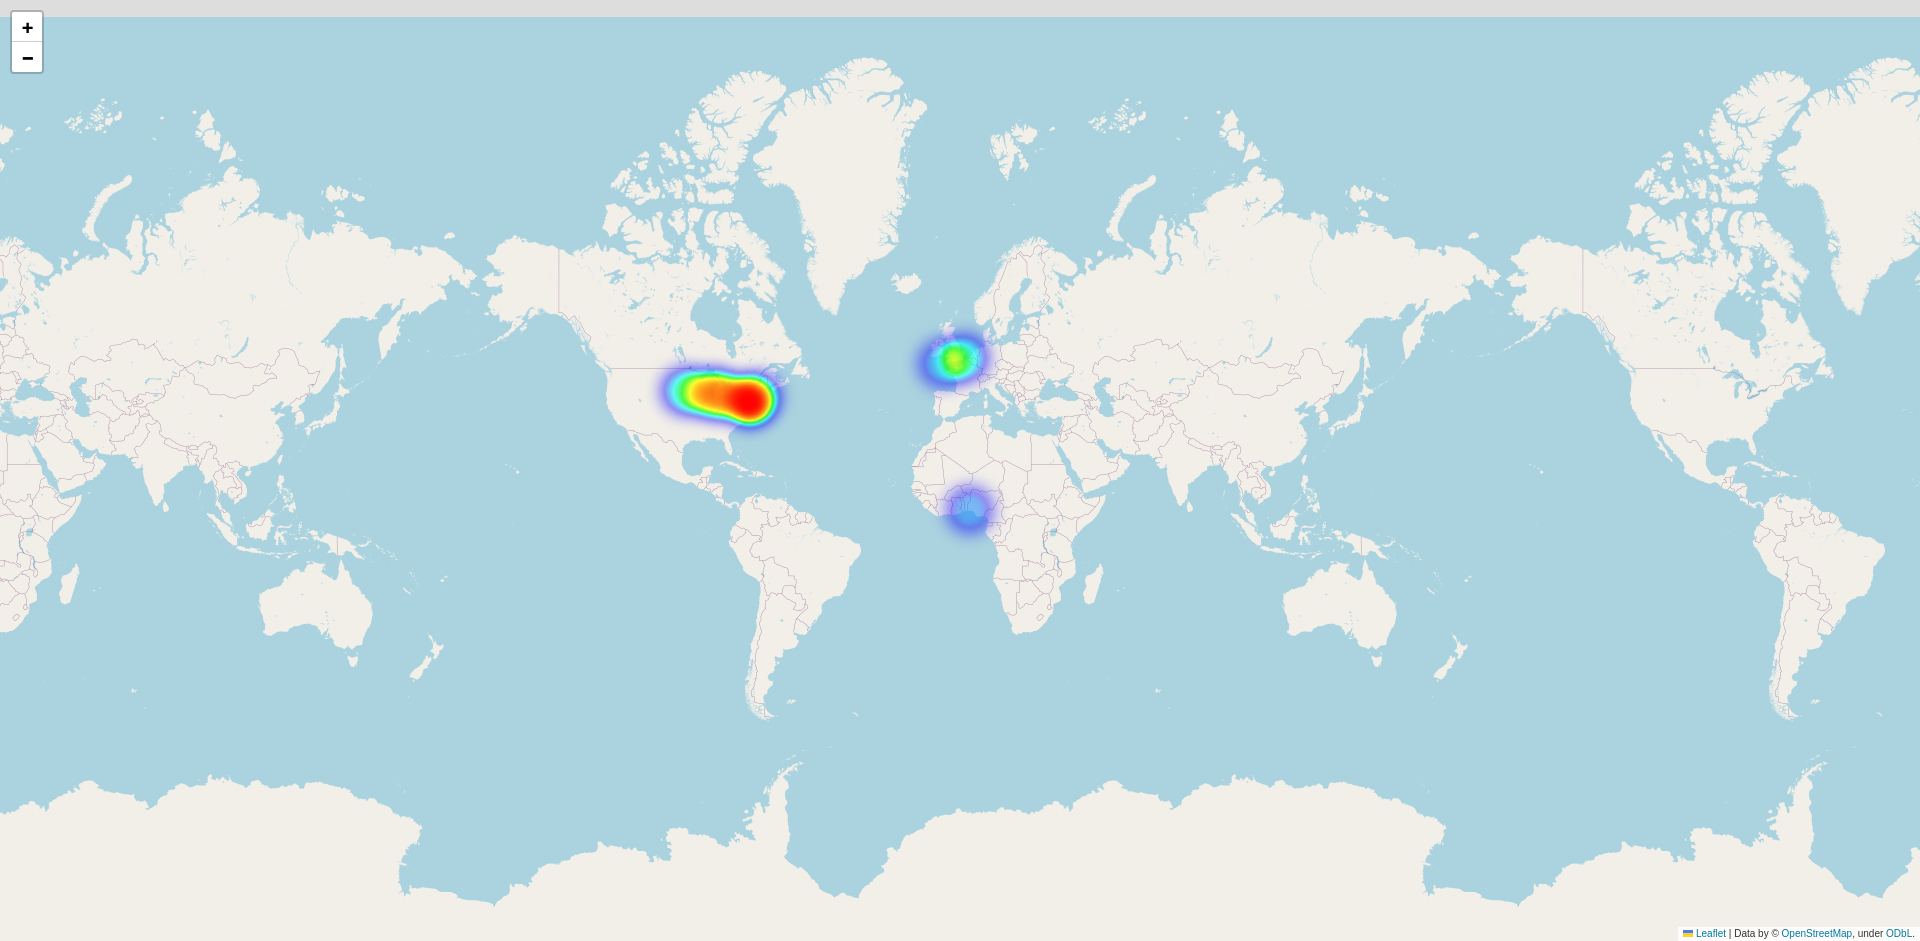

In [ ]:
html_file = '../output/maps/reddit_heatmap.html'  
output_image = '../output/maps/reddit_heatmap.png'
capture_map_html(html_file, output_image)

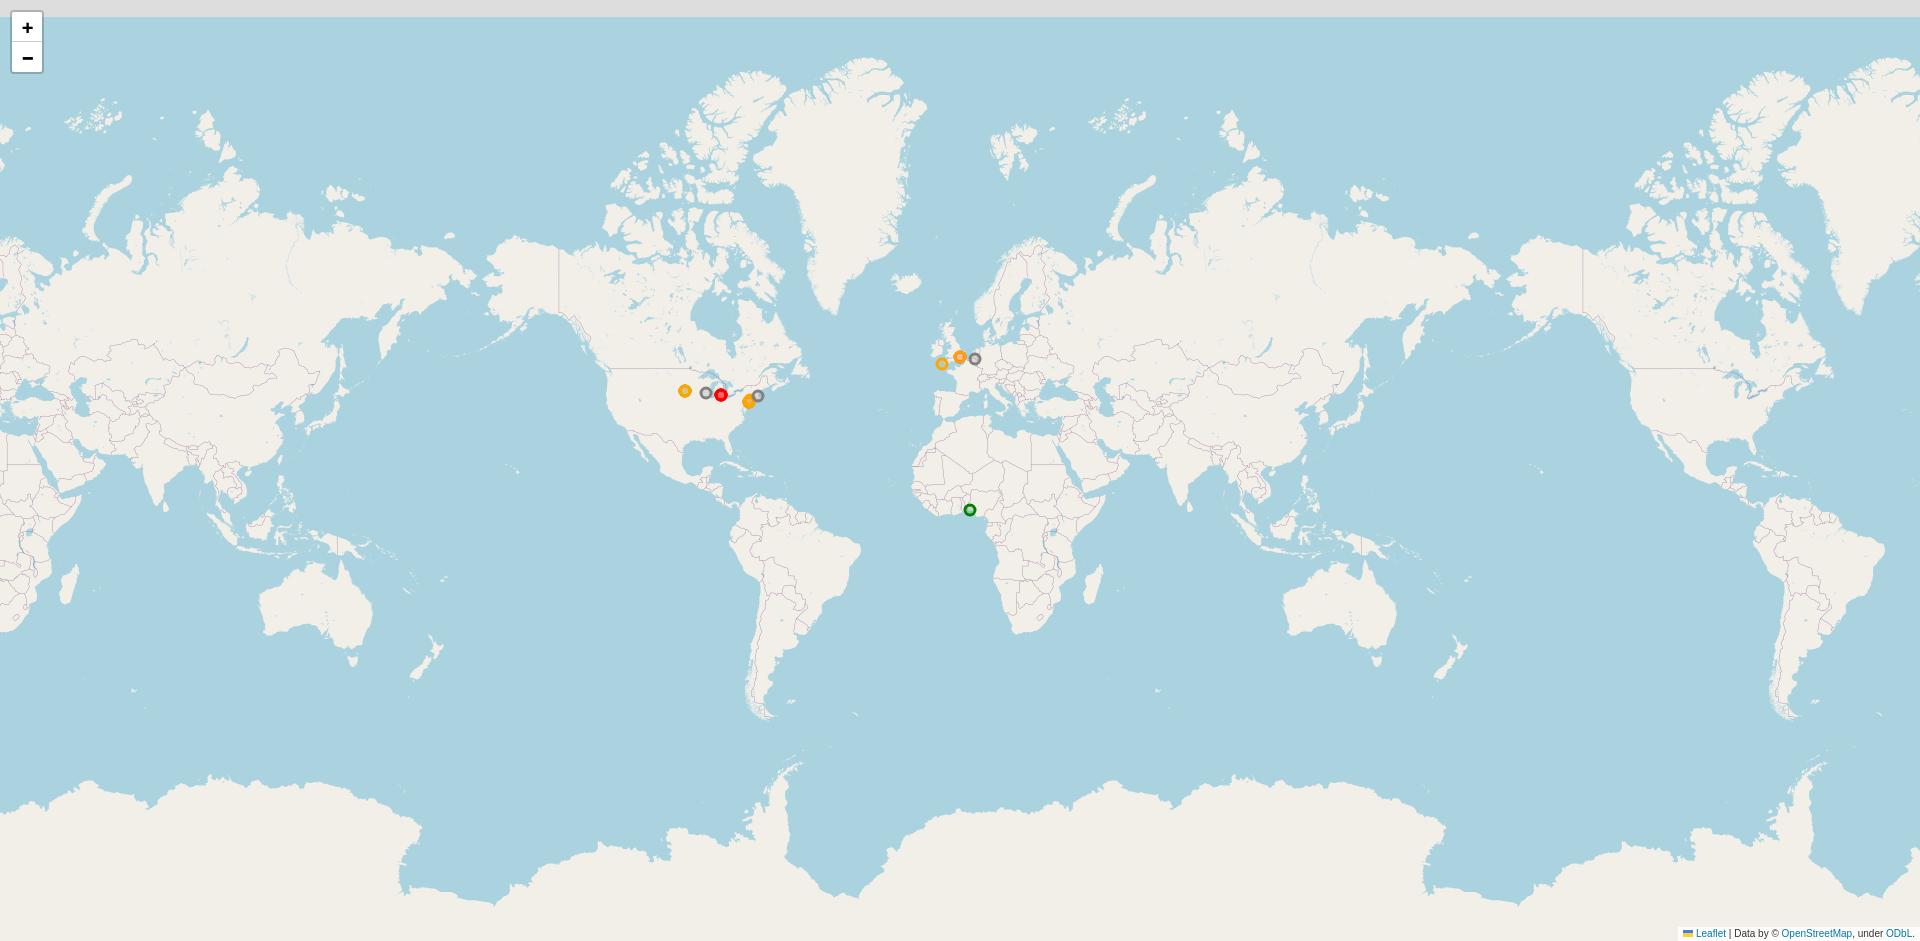

In [47]:
html_file = '../output/maps/reddit_risk_map.html'  
output_image = '../output/maps/reddit_risk_map.png'
capture_map_html(html_file, output_image)

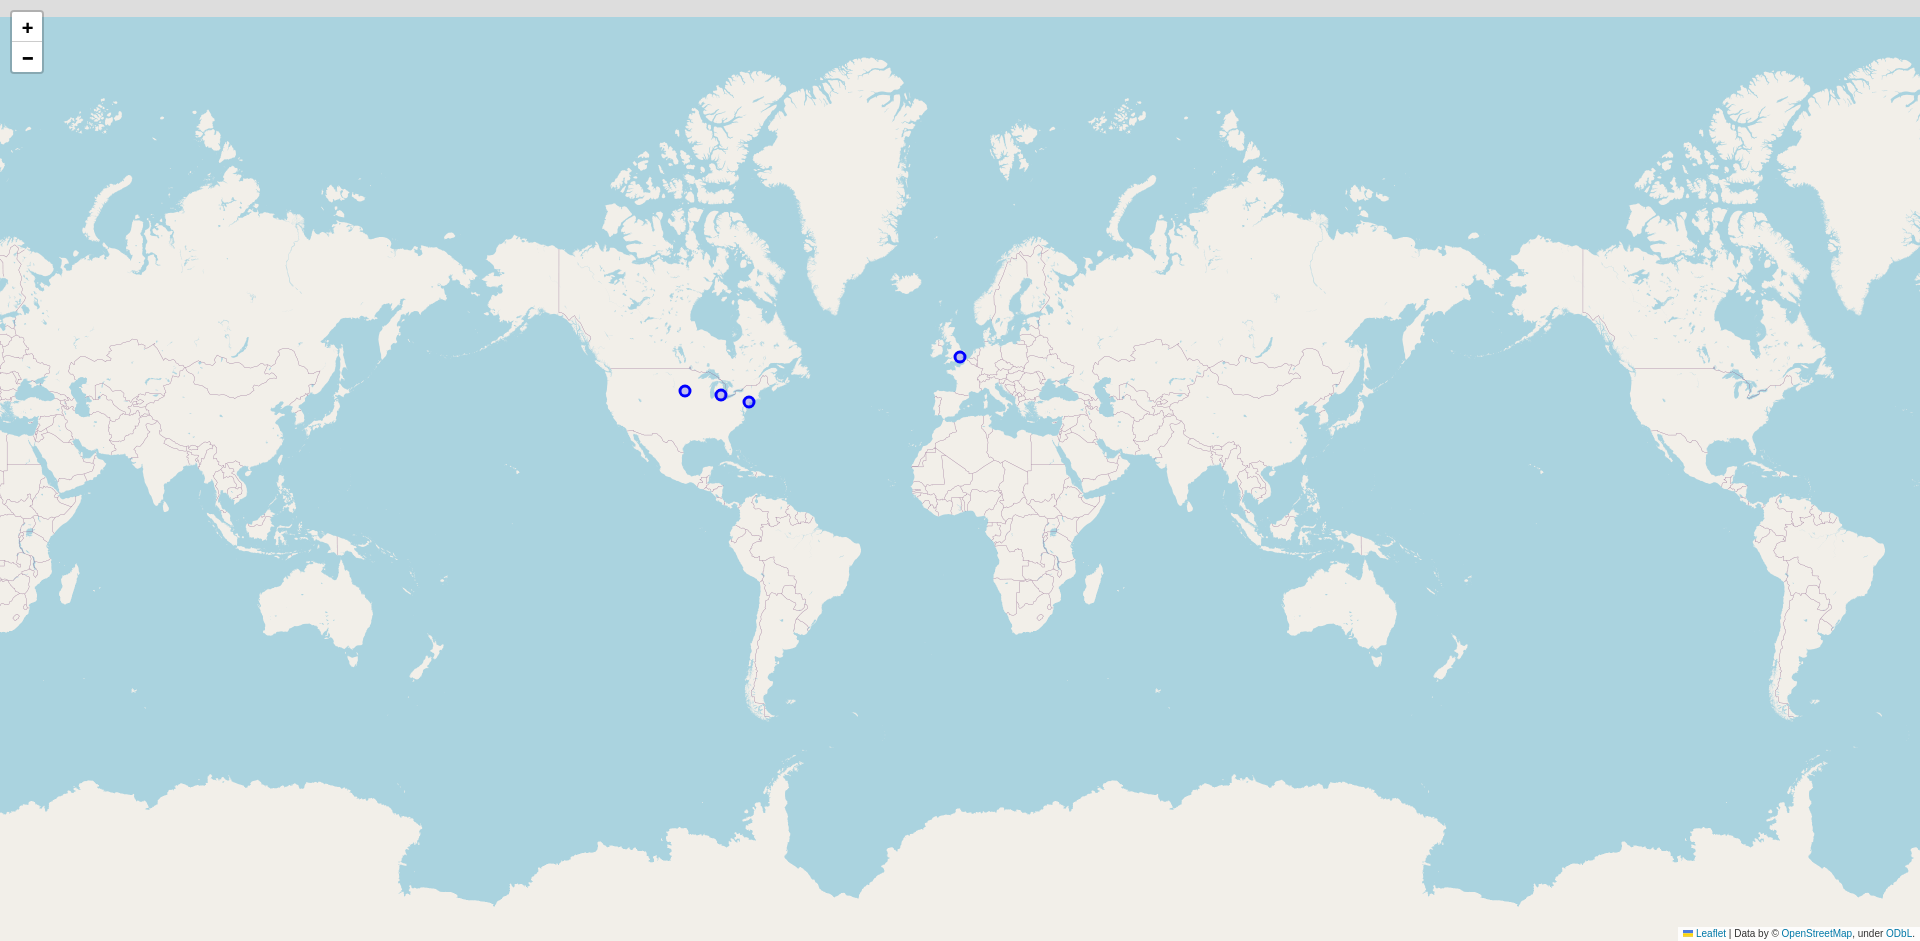

In [48]:
html_file = '../output/maps/reddit_top_locations.html'      
output_image = '../output/maps/reddit_top_locations.png'
capture_map_html(html_file, output_image)